In [1]:
import scipy.integrate
import numpy
import matplotlib.pyplot as plt

# Source: http://www.public.asu.edu/~hnesse/classes/sirvec.html?BetaH=0.9&Gamma=0.1&MuH=0.1&B=1&M=3&A=1&MuV=0.1&BetaV=1&initialSH=10&initialIH=1&initialRH=0&initialSV=5&initialIV=0&iters=15

In [2]:
# The SIR-VECTOR model differential equations.
def deriv(y, t, Nh, Bh, gamma, u_h, b, m, A, u_v, Bv):
    Sh, Ih, Rh, Sv, Iv = y
    dShdt = u_h*(Nh-Sh) - ((Bh * b)*(Sh * Iv)/(Nh + m))
    dIhdt = (Bh * b) * (Sh * Iv)/ (Nh + m)  - ((u_h + gamma) * Ih)
    dRhdt = (gamma * Ih) - (u_h * Rh)
    dSvdt = A - ((Bv *  b)*(Sv*Ih)/(Nh + m)) - (u_v * Sv)
    dIvdt = ((Bv * b)*(Sv*Ih)/(Nh+m)) - (u_v * Iv)
    return dShdt, dIhdt, dRhdt, dSvdt, dIvdt

In [3]:
Bh = 0.9  # βh the transmission probabilitiesfrom the vector to human
gamma = 0.1  # The rate an infected human recovers and moves into the resistant phase.
u_h = 0.1 # μh the per capita mortality rates of humans The natural mortality rate (this is unrelated to disease) of humans. This models a population of a constant size, with no maternal transmission.
b = 1  # b, the biting rate (i.e. average number of bites permosquito per day) This controls how often a mosquito bites a person.
m = 3 # m, the number ofalternative hosts available as the blood source;The so-called "half saturation constant," this parameter controls how the number of new infections change as the density of susceptible individuals changes.
A = 1 # A, a constant recruitment rate for the vector;  # It assumes a constant number of vectors such as mosquitos are constantly entering the population. # This is the recruitment (growth) of vectors. 
u_v = 0.1 # μv the per capita mortality rates of mosquito, Mu (vector) is similar to that for humans. It describes the mortality rate of vectors, which is independent of disease.
Bv = 1 # βv the transmission probabilitiesfrom the human to vector. The beta (vector) parameter is the rate of infection of mosquito per bite.
Sh = 10 # Initial: The number of susceptible humans at the beginning of the model run.   
Ih = 1 # Infected Humans: The number of infected individuals at the beginning of the model run.
Rh = 0 # The number of recovered individuals at the beginning of the model run.
Sv = 5 # Susceptible Vectors: The number of susceptible vectors at the beginning of the model run.
Iv = 0 # Infected Vector: The number of infected vectors at the beginning of the model run.

In [4]:
meses = 1; dias = 15
t = numpy.linspace(0, meses*dias, meses*dias) # Tempo em dias

In [5]:
Nh = Sh + Ih + Rh # Populacao 

In [6]:
y0 = Sh, Ih, Rh, Sv, Iv # Vetor de condições inciais
args = Nh, Bh, gamma, u_h, b, m, A, u_v, Bv
# Integrate the SIR equations over the time grid, t.
ret = scipy.integrate.odeint(deriv, y0, t, args=args)
Sh, Ih, Rh, Sv, Iv = ret.T

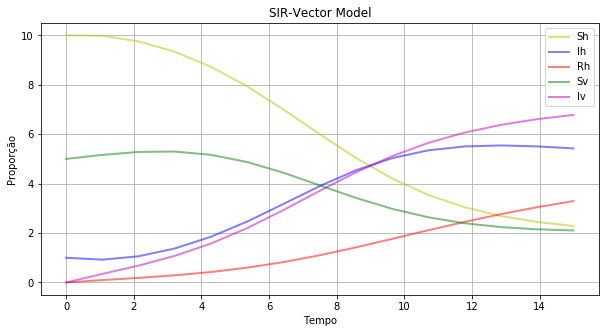

In [7]:
plt.figure(figsize=[10,5])
plt.plot(t, Sh, 'y', alpha=0.5, lw=2, label='Sh')
plt.plot(t, Ih, 'b', alpha=0.5, lw=2, label='Ih')
plt.plot(t, Rh, 'r', alpha=0.5, lw=2, label='Rh')
plt.plot(t, Sv, 'g', alpha=0.5, lw=2, label='Sv')
plt.plot(t, Iv, 'm', alpha=0.5, lw=2, label='Iv')
plt.grid()
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Proporção")
plt.title("SIR-Vector Model")
plt.show()